In [1]:
import numpy as np
from scipy import signal
import matplotlib.pyplot as plt

import time

In [2]:
def print_arrs(*args):
    splits = [arg.__str__().split('\n') for arg in args]

    for lines in zip(*splits):
        print("   ".join(lines))

In [3]:
base = np.arange(7*7).reshape(7,7)

maskl = np.zeros((2,6), dtype=int)
maskr = maskl.copy()

maskl[0,0]=1
maskr[-1,-1]=1
print(base)
print()
print_arrs(maskl, maskr)

[[ 0  1  2  3  4  5  6]
 [ 7  8  9 10 11 12 13]
 [14 15 16 17 18 19 20]
 [21 22 23 24 25 26 27]
 [28 29 30 31 32 33 34]
 [35 36 37 38 39 40 41]
 [42 43 44 45 46 47 48]]

[[1 0 0 0 0 0]   [[0 0 0 0 0 0]
 [0 0 0 0 0 0]]    [0 0 0 0 0 1]]


In [4]:
#signal.convolve2d(base, mask, boundary='wrap', mode='same').astype(int)

# for convolve (faster than correlation) mask have to be fliped (180 rotation)
flip_l = maskl[::-1,::-1]
flip_r = maskr[::-1,::-1]

resl = signal.convolve2d(base, flip_l, boundary='wrap', mode='same').astype(int)
resr = signal.convolve2d(base, flip_r, boundary='wrap', mode='same').astype(int)

print_arrs(resl, resr)

resl = signal.convolve2d(base, flip_l, boundary='wrap', mode='full').astype(int)
resr = signal.convolve2d(base, flip_r, boundary='wrap', mode='full').astype(int)
print()
print()
print_arrs(resl, resr)

[[46 47 48 42 43 44 45]   [[ 2  3  4  5  6  0  1]
 [ 4  5  6  0  1  2  3]    [ 9 10 11 12 13  7  8]
 [11 12 13  7  8  9 10]    [16 17 18 19 20 14 15]
 [18 19 20 14 15 16 17]    [23 24 25 26 27 21 22]
 [25 26 27 21 22 23 24]    [30 31 32 33 34 28 29]
 [32 33 34 28 29 30 31]    [37 38 39 40 41 35 36]
 [39 40 41 35 36 37 38]]    [44 45 46 47 48 42 43]]


[[44 45 46 47 48 42 43 44 45 46 47 48]   [[ 0  1  2  3  4  5  6  0  1  2  3  4]
 [ 2  3  4  5  6  0  1  2  3  4  5  6]    [ 7  8  9 10 11 12 13  7  8  9 10 11]
 [ 9 10 11 12 13  7  8  9 10 11 12 13]    [14 15 16 17 18 19 20 14 15 16 17 18]
 [16 17 18 19 20 14 15 16 17 18 19 20]    [21 22 23 24 25 26 27 21 22 23 24 25]
 [23 24 25 26 27 21 22 23 24 25 26 27]    [28 29 30 31 32 33 34 28 29 30 31 32]
 [30 31 32 33 34 28 29 30 31 32 33 34]    [35 36 37 38 39 40 41 35 36 37 38 39]
 [37 38 39 40 41 35 36 37 38 39 40 41]    [42 43 44 45 46 47 48 42 43 44 45 46]
 [44 45 46 47 48 42 43 44 45 46 47 48]]    [ 0  1  2  3  4  5  6  0  1  2  3  4]]


[[0.00073308 0.00150607 0.00263664 0.0039334  0.00500034 0.0054168
  0.00500034 0.0039334  0.00263664 0.00150607 0.00073308]
 [0.00139028 0.00285624 0.00500034 0.00745963 0.00948304 0.01027286
  0.00948304 0.00745963 0.00500034 0.00285624 0.00139028]
 [0.0022468  0.00461589 0.00808092 0.01205531 0.0153253  0.0166017
  0.0153253  0.01205531 0.00808092 0.00461589 0.0022468 ]
 [0.00309412 0.00635667 0.01112845 0.0166017  0.0211049  0.02286266
  0.0211049  0.0166017  0.01112845 0.00635667 0.00309412]
 [0.00363099 0.00745963 0.01305936 0.01948228 0.02476683 0.02682958
  0.02476683 0.01948228 0.01305936 0.00745963 0.00363099]
 [0.00363099 0.00745963 0.01305936 0.01948228 0.02476683 0.02682958
  0.02476683 0.01948228 0.01305936 0.00745963 0.00363099]
 [0.00309412 0.00635667 0.01112845 0.0166017  0.0211049  0.02286266
  0.0211049  0.0166017  0.01112845 0.00635667 0.00309412]
 [0.0022468  0.00461589 0.00808092 0.01205531 0.0153253  0.0166017
  0.0153253  0.01205531 0.00808092 0.00461589 0.00224

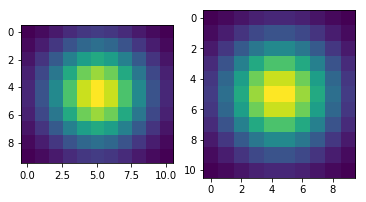

In [73]:
# gaussian check

dx = 1.0
sigma = 5/2.0
sigma2 = np.square(sigma)
gauss_cutoff = 0.2
gauss_r = np.sqrt(-2*sigma2*np.log(gauss_cutoff))

odd_axis = int(np.ceil(gauss_r/dx))*2 + 1
even_axis = int(np.ceil((gauss_r-dx*0.5)/dx))*2 + 2
# shape deterimnation // asuming x-slope (odd, even) / y-slope (even, odd)

odd_edge = odd_axis//2
odd_range = np.linspace(-odd_edge, odd_edge, odd_axis)

even_edge = even_axis//2-0.5*dx
even_range = np.linspace(-even_edge, even_edge, even_axis)

#xx, yy = np.meshgrid(even_range,odd_range)
xx, yy = np.meshgrid(odd_range, even_range)

g_value = np.exp(-(np.square(xx) + np.square(yy))/(2*sigma2))
g_value = g_value/np.sum(g_value)

print(g_value)
plt.subplot(1,2,1)
plt.imshow(g_value)
plt.subplot(1,2,2)
plt.imshow(g_value.T)

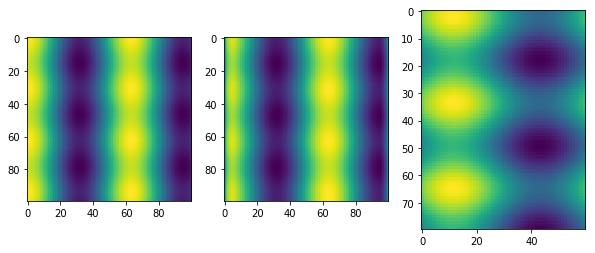

In [72]:
bx, by = np.meshgrid(np.arange(100), np.arange(100))
plane = np.cos(bx*0.1)+0.1*np.cos(by*0.2)


plt.figure(figsize=(10,10))
plt.subplot(1,3,1)
plt.imshow(plane)


conv_plane = signal.convolve2d(plane, g_value, boundary='wrap', mode='same')
plt.subplot(1,3,2)
plt.imshow(conv_plane)

plt.subplot(1,3,3)
plt.imshow((conv_plane-plane)[10:-10, 20:-20])

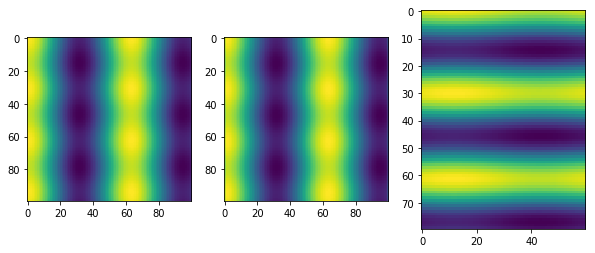

In [68]:
bx, by = np.meshgrid(np.arange(100), np.arange(100))
plane = np.cos(bx*0.1)+0.1*np.cos(by*0.2)


plt.figure(figsize=(10,10))
plt.subplot(1,3,1)
plt.imshow(plane)


conv_plane = signal.convolve2d(plane, g_value, boundary='wrap', mode='same')
plt.subplot(1,3,2)
plt.imshow(conv_plane)

plt.subplot(1,3,3)
plt.imshow((conv_plane-plane)[10:-10, 20:-20])

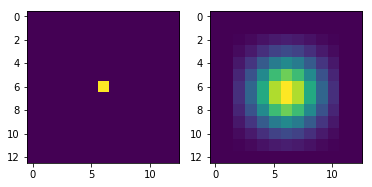

In [66]:
width = 13
plane = np.zeros((width, width), dtype=float)
plane[width//2, width//2] = 1
#plane[0, 0] = 1

plt.subplot(1,2,1)
plt.imshow(plane)

conv_plane = signal.convolve2d(plane, g_value, boundary='wrap', mode='same')
plt.subplot(1,2,2)
plt.imshow(conv_plane)

In [45]:

a = np.random.random((500,500))

In [50]:
%timeit np.diff(a)

286 µs ± 1.06 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [19]:
x = np.arange(16).reshape(4,4)

In [26]:
w = np.roll(x, 1, axis=(0,1))

In [47]:
def slope_x(x,)

In [49]:
%timeit roll_diff(a)

275 µs ± 1.05 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [42]:
%timeit a-a

3.22 µs ± 47 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)


In [57]:
w = np.arange(16).reshape(4,4)
print(w)
w = np.roll(w, 1, axis=1)
w[:,0] += [10,10,10,10]
print()
print(w)

[[ 0  1  2  3]
 [ 4  5  6  7]
 [ 8  9 10 11]
 [12 13 14 15]]

[[13  0  1  2]
 [17  4  5  6]
 [21  8  9 10]
 [25 12 13 14]]


In [76]:
# calculate global slope

theta = np.radians(45)
g_slope = np.tan(theta)
g_slope
slope_x = np.sqrt(2)*0.5
slope_x

0.7071067811865476

In [78]:
r = np.random.random((200,200))

In [79]:
%timeit np.power(r, 2)

263 µs ± 4.08 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [80]:
%timeit np.square(r)

18.4 µs ± 52.1 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)
